<a href="https://colab.research.google.com/github/Bhavanalagadapati/Hepatitis-C-Prediction/blob/main/PythonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [ ]:
data=pd.read_csv('/content/hepatitisc.zip')

In [ ]:
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
target_column='Category'
label_encoder=LabelEncoder()
data[target_column]=label_encoder.fit_transform(data[target_column])

In [ ]:
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,4,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,4,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,4,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,4,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
data.shape

(615, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    int64  
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 67.4+ KB


In [ ]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
data.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,4,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,4,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,4,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,4,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,4,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [ ]:
data.describe

<bound method NDFrame.describe of      Unnamed: 0  Category  Age Sex   ALB    ALP    ALT    AST   BIL    CHE  \
0             1         0   32   m  38.5   52.5    7.7   22.1   7.5   6.93   
1             2         0   32   m  38.5   70.3   18.0   24.7   3.9  11.17   
2             3         0   32   m  46.9   74.7   36.2   52.6   6.1   8.84   
3             4         0   32   m  43.2   52.0   30.6   22.6  18.9   7.33   
4             5         0   32   m  39.2   74.1   32.6   24.8   9.6   9.15   
..          ...       ...  ...  ..   ...    ...    ...    ...   ...    ...   
610         611         4   62   f  32.0  416.6    5.9  110.3  50.0   5.57   
611         612         4   64   f  24.0  102.8    2.9   44.4  20.0   1.54   
612         613         4   64   f  29.0   87.3    3.5   99.0  48.0   1.66   
613         614         4   46   f  33.0    NaN   39.0   62.0  20.0   3.56   
614         615         4   59   f  36.0    NaN  100.0   80.0  12.0   9.07   

     CHOL   CREA    GGT  PROT

In [ ]:
data["Age"].value_counts()

46    32
48    28
33    25
51    24
52    22
50    21
49    21
35    21
38    20
53    20
37    20
43    20
44    20
47    20
56    20
45    19
34    19
59    18
32    17
57    16
36    16
41    16
39    15
40    14
55    14
42    13
54    12
60    12
58    10
61     9
64     9
62     8
65     8
63     6
68     4
66     4
67     3
70     3
71     3
76     2
74     2
29     2
77     1
19     1
23     1
25     1
27     1
30     1
75     1
Name: Age, dtype: int64

In [ ]:
print('The highest unnamed:0 was of:',data['Unnamed: 0'].max())
print('The lowest unnamed:0 was of:',data['Unnamed: 0'].min())
print('The average unamed:0 in the data:',data['Unnamed: 0'].mean())

The highest unnamed:0 was of: 615
The lowest unnamed:0 was of: 1
The average unamed:0 in the data: 308.0


Pre-Processing

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
610    False
611    False
612    False
613    False
614    False
Length: 615, dtype: bool

In [ ]:
data.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [ ]:
data=data.fillna(method='ffill')
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,4,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,4,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,4,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,4,46,f,33.0,87.3,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
data.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

Data Visualization

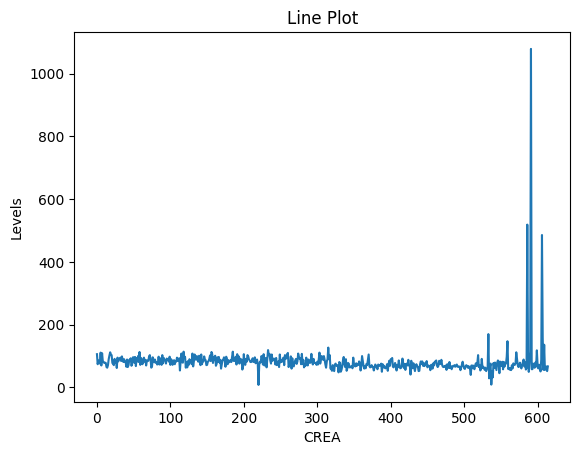

In [ ]:
#line plot
plt.plot(data['CREA'])
plt.xlabel("CREA")
plt.ylabel("Levels")
plt.title("Line Plot")
plt.show()

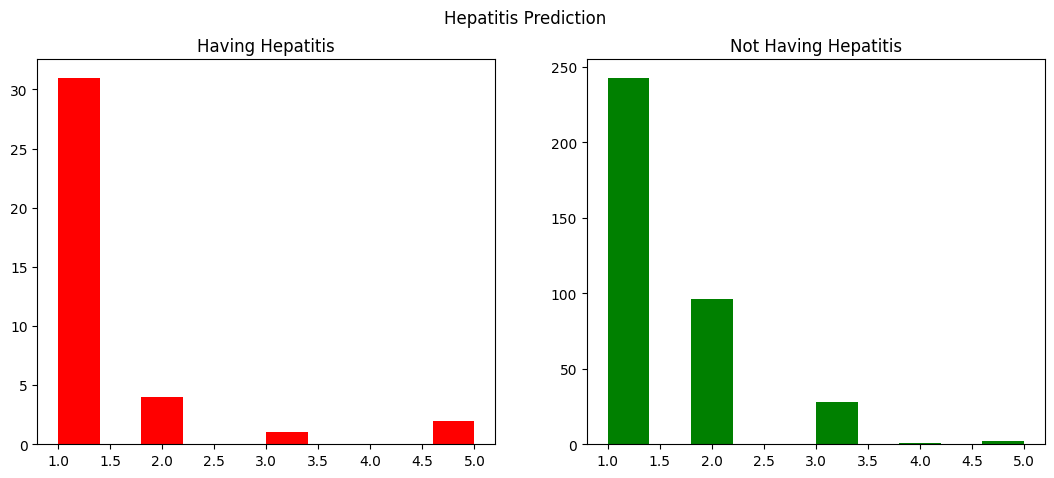

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Conditions for individuals with Hepatitis (Category 1, 2, or 3)
hepatitis_conditions = (data['Category'] == 1) | (data['Category'] == 2) | (data['Category'] == 3)
data_len_hepatitis = data[hepatitis_conditions]['ALP'].value_counts()

ax1.hist(data_len_hepatitis, color='red')
ax1.set_title('Having Hepatitis')

# Conditions for individuals without Hepatitis (Category 0)
no_hepatitis_conditions = (data['Category'] == 0)
data_len_no_hepatitis = data[no_hepatitis_conditions]['ALP'].value_counts()

ax2.hist(data_len_no_hepatitis, color='green')
ax2.set_title('Not Having Hepatitis')

fig.suptitle('Hepatitis Prediction')
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
#assuming 'classification' is a variable containing the target column name
classification = 'Category' #replace with your actual target column name
#select features (x) and target variable (y)
feature_columns = ['Unnamed: 0','Age','Sex','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']
X = data[feature_columns]
y = data[classification]
X.replace('\t?',np.nan,inplace=True)
#convert columns to numeric (assuminf that they are numeric features)
X = X.apply(pd.to_numeric,errors='coerce')
#impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
#split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
# Create and fit the Logistic Regression model
model = LogisticRegression()
model.fit(train_X, train_Y)
# Make predictions on the test set
prediction = model.predict(test_X)
# Print accuracy and classification report
accuracy = metrics.accuracy_score(prediction,test_Y)
print('The accuracy of Logistic Regression is:', accuracy)
report = classification_report(test_Y, prediction)
print("Classification Report:\n", report)


The accuracy of Logistic Regression is: 0.8861788617886179
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        96
           1       0.33      0.33      0.33         3
           2       0.67      0.67      0.67         9
           3       0.40      0.33      0.36         6
           4       0.67      0.44      0.53         9

    accuracy                           0.89       123
   macro avg       0.61      0.56      0.58       123
weighted avg       0.87      0.89      0.88       123



In [ ]:
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report #for confusion matrix
from sklearn.linear_model import LogisticRegression,LinearRegression #linear regression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(train_X, train_Y)

# Make predictions on the test set
prediction = model.predict(test_X)

# Assuming 'test_Y' contains the true labels for the test set
# Calculate the accuracy
accuracy = accuracy_score(test_Y, prediction.round())

# Print the accuracy
print('The accuracy of Linear Regression is:', accuracy)

#Evaluate the model using various metrices
mse = mean_squared_error(test_Y, prediction)
rmse = mean_squared_error(test_Y, prediction, squared=False) #Calculate the square root of MSE
mae = mean_absolute_error(test_Y, prediction)
r_squared=r2_score(test_Y, prediction)

print('Mean squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('Mean Absolute Error:',mae)
print('R-squared:',r_squared)

The accuracy of Linear Regression is: 0.7723577235772358
Mean squared Error: 0.6629477671238684
Root Mean Squared Error: 0.8142160445016227
Mean Absolute Error: 0.47359049401654296
R-squared: 0.5736743701089431
